In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pysindy as ps

In [22]:
# Lorenz system
def lorenz_system(state, t, sigma=10, beta=8/3, rho=28):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Init conditions and time points
initial_state = [1.0, 1.0, 1.0]
t = np.linspace(0, 25, 100000)

# generate data
data = odeint(lorenz_system, initial_state, t)

In [23]:
# Define a polynomial library 
polynomial_library = ps.PolynomialLibrary(degree=5)

# Instantiate the SINDy model
model = ps.SINDy(feature_library=polynomial_library)

# Fit model
model.fit(data, t=t)

# result
model.print()

(x0)' = -10.000 x0 + 10.000 x1
(x1)' = 28.000 x0 + -1.000 x1 + -1.000 x0 x2
(x2)' = -2.667 x2 + 1.000 x0 x1


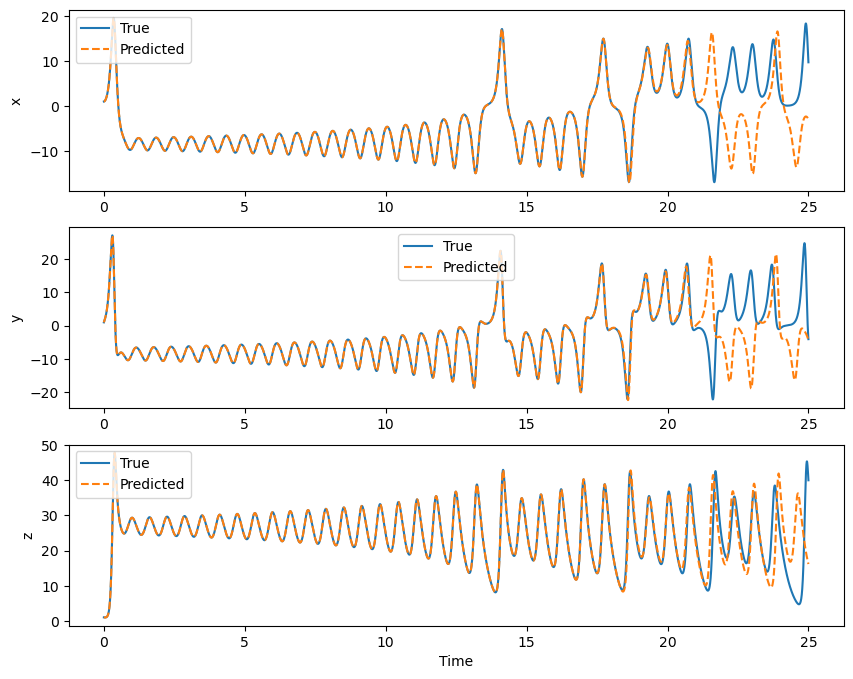

In [24]:
# Predictions
x0 = data[0]  # initial condition
data_pred = model.simulate(x0, t)

# Result
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
labels = ['x', 'y', 'z']
for i in range(3):
    axs[i].plot(t, data[:, i], label='True')
    axs[i].plot(t, data_pred[:, i], '--', label='Predicted')
    axs[i].set_ylabel(labels[i])
    axs[i].legend()
plt.xlabel('Time')
plt.show()

### EOF